# Linear Regression

Linear regression is the most commonly used Machine Learning model and can be found all across scientific and business domains.
It's also quite easy to perform in PyTorch. So let's get started.

## Load and explore the data

We're going to study the relationship between a country's Gross Domestic Product and its Population. For this, I've downloaded and cleaned a small demographics dataset for us.

Notes:
The data was downloaded from https://databank.worldbank.org/embed/Population-and-GDP-by-Country/id/29c4df41. We're looking at the 2016 data. The population is in millions and the GDP is in current USD.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("worldbank.csv" , dtype={
  "Country": str,
  "GDP": float,
  "Population": float,
})
df.head()

,Country,GDP,Population
0,United States,16197.0,313.9
1,China,8532.0,1350.7
2,United Kingdom,2704.0,63.7
3,South Asia,2300.0,1683.7
4,India,1828.0,1265.8


## Visualize the data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

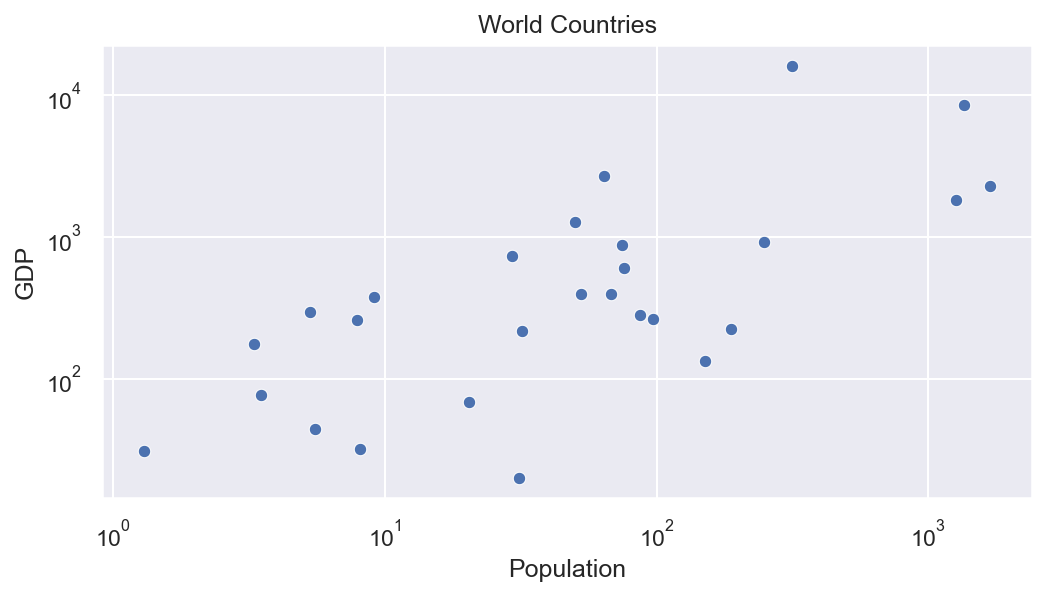

In [11]:
f, ax = plt.subplots(figsize=(8, 4))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=df, x="Population", y="GDP", ax=ax).set_title("World Countries")
plt.savefig("figures/data.png")
plt.show()

## Prepare the data

We will use the logarithms of the Population and GDP variables since it will be more numerically stable.

In [12]:
import torch

In [13]:
X = torch.Tensor(df["Population"])
y = torch.Tensor(df["GDP"])
X = X.log10()[:, None]
y = y.log10()[:, None]

In [14]:
X.shape, y.shape

(torch.Size([27, 1]), torch.Size([27, 1]))

Let's see the training data one more time before we start working Linear Regression

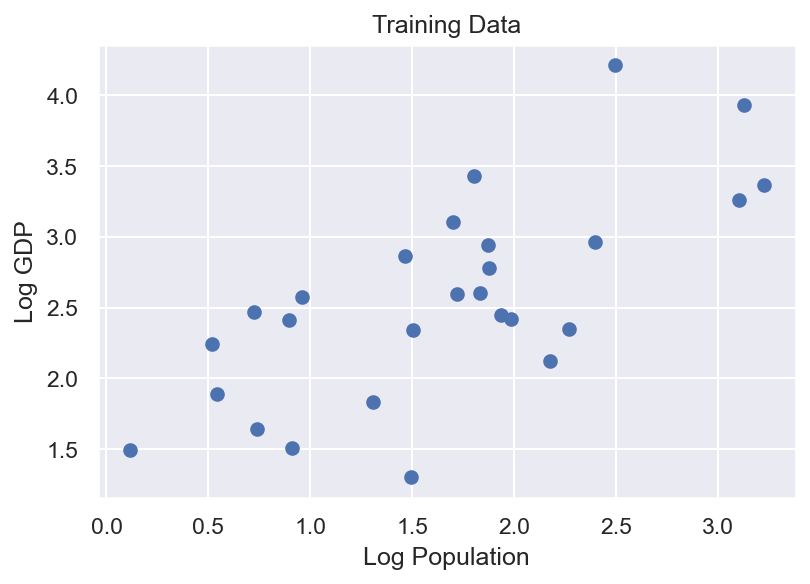

In [16]:
plt.title("Training Data")
plt.xlabel("Log Population")
plt.ylabel("Log GDP")
plt.scatter(X, y)

## Define the model

In [28]:
from torch.nn import Linear

In [54]:
model = Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

## Training

In [55]:
from tqdm.notebook import tqdm
from torch.nn import MSELoss
from torch.optim import SGD

In [56]:
LEARNING_RATE = 0.01
N_ITERS = 200

In [57]:
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=LEARNING_RATE)

In [58]:
pbar = tqdm(range(N_ITERS), desc="Training the model")
losses = []
avg_loss = 0

for i in pbar:
    model.zero_grad()
    y_hat = model(X)
    loss_i = criterion(y_hat, y)
    loss_i.backward()
    loss_i = loss_i.item()
    optimizer.step()
    avg_loss = (avg_loss * i + loss_i) / (i + 1)
    losses.append(loss_i)
    pbar.set_postfix({"loss": loss_i})

Training the model:   0%|          | 0/200 [00:00<?, ?it/s]

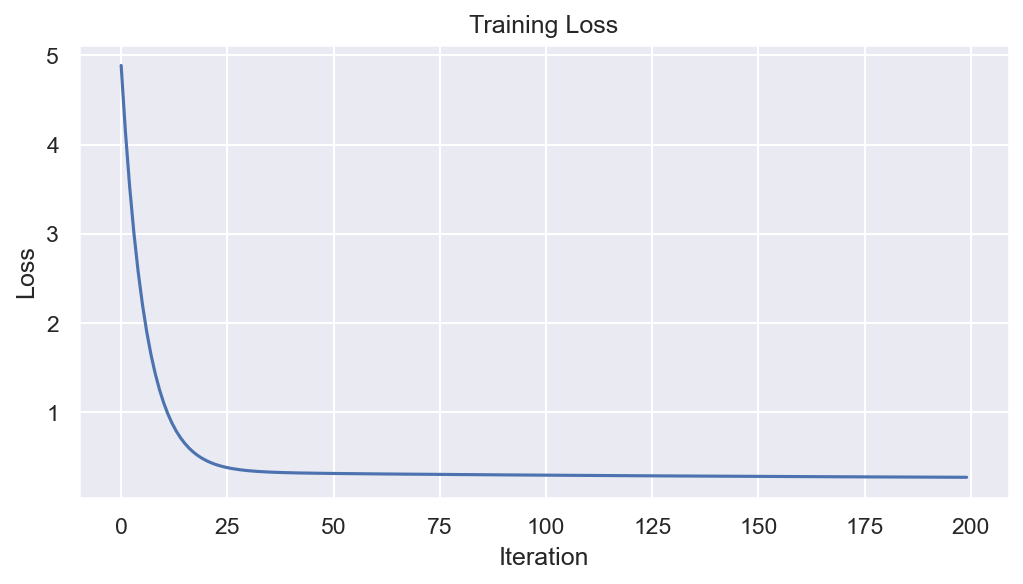

In [60]:
plt.figure(dpi=150, figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig("figures/training.png")
plt.show()